In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sb
import pylab
import scipy.stats as st
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("C:\\Users\\Dhruva\\OneDrive\\Desktop\\AIDA\\multiple linear regression\\execom ieee dataset\\train.csv")

In [4]:
df1.head()

,id,age,sex,bmi,children,smoker,region,charges
0,333,61,0,31.160,0,0,1,13429.03540
1,356,46,1,27.600,0,0,3,24603.04837
2,139,54,0,31.900,3,0,2,27322.73386
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560


In [8]:
df1.shape

(936, 8)

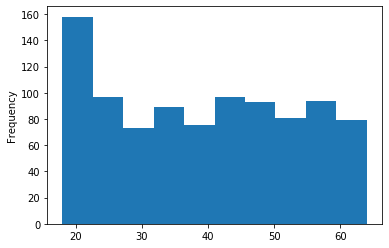

In [5]:
df1["age"].plot.hist()

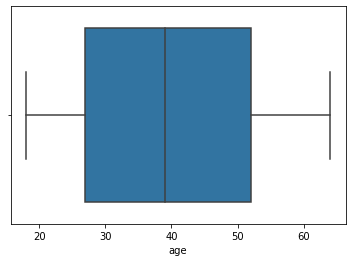

In [6]:
sb.boxplot(x="age", data=df1)

In [7]:
df1.describe()

,id,age,sex,bmi,children,smoker,region,charges
count,936.000000,936.00000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,666.007479,39.19765,0.512821,30.541629,1.108974,0.208333,1.477564,13379.157307
std,388.469751,14.12399,0.500103,5.996200,1.212627,0.406334,1.113615,12108.882855
min,1.000000,18.00000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,326.750000,27.00000,0.000000,26.220000,0.000000,0.000000,0.000000,4819.842913
50%,673.500000,39.00000,1.000000,30.210000,1.000000,0.000000,1.000000,9526.937700
75%,1002.250000,52.00000,1.000000,34.443750,2.000000,0.000000,2.000000,17222.181875
max,1338.000000,64.00000,1.000000,53.130000,5.000000,1.000000,3.000000,62592.873090


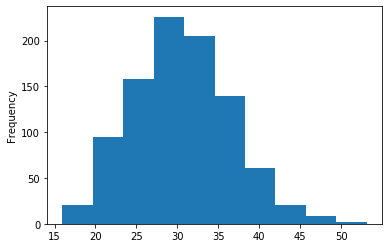

In [8]:
df1["bmi"].plot.hist()

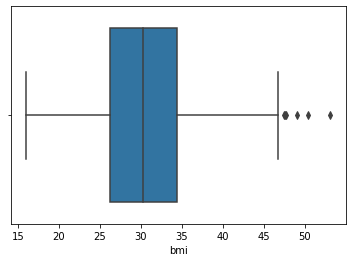

In [9]:
sb.boxplot(x="bmi", data=df1)

In [13]:
df1[df1['bmi']>46]

,id,age,sex,bmi,children,smoker,region,charges
10,550,43,0,46.20,0,1,2,45863.2050
62,848,23,1,50.38,1,0,2,2438.0552
184,1089,52,1,47.74,1,0,2,9748.9106
285,942,50,0,46.09,1,0,2,9549.5651
407,455,32,1,46.53,2,0,2,4686.3887
436,548,54,0,46.70,2,0,3,11538.4210
445,1318,18,1,53.13,0,0,2,1163.4627
570,117,58,1,49.06,0,0,2,11381.3254
871,402,47,1,47.52,1,0,2,8083.9198
934,861,37,0,47.60,2,1,3,46113.5110


In [14]:
df1[df1['bmi']>46].count()

id          10
age         10
sex         10
bmi         10
children    10
smoker      10
region      10
charges     10
dtype: int64

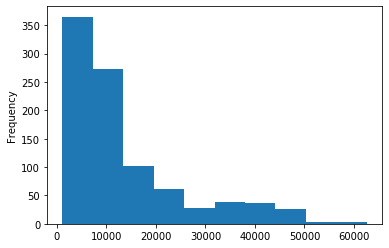

In [10]:
df1["charges"].plot.hist()

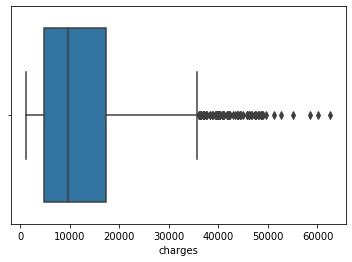

In [11]:
sb.boxplot(x="charges", data=df1)

In [11]:
df1[df1['charges']>35000]

,id,age,sex,bmi,children,smoker,region,charges
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560
5,1091,47,1,36.190,0,1,2,41676.08110
10,550,43,0,46.200,0,1,2,45863.20500
41,683,39,1,35.300,2,1,3,40103.89000
...,...,...,...,...,...,...,...,...
879,35,28,1,36.400,1,1,3,51194.55914
909,857,48,0,33.110,0,1,2,40974.16490
911,253,54,1,34.210,2,1,2,44260.74990
926,331,61,0,36.385,1,1,0,48517.56315


In [12]:
df1[df1['charges']>35000].count()

id          92
age         92
sex         92
bmi         92
children    92
smoker      92
region      92
charges     92
dtype: int64

In [12]:
df1.corr()

,id,age,sex,bmi,children,smoker,region,charges
id,1.000000,-0.023012,-0.021336,-0.027848,0.031904,0.030230,-0.013628,0.032827
age,-0.023012,1.000000,-0.013154,0.106366,0.061936,-0.046504,0.007320,0.288804
sex,-0.021336,-0.013154,1.000000,0.002457,0.018857,0.047368,-0.036931,0.040390
bmi,-0.027848,0.106366,0.002457,1.000000,-0.004898,-0.003923,0.183308,0.194264
children,0.031904,0.061936,0.018857,-0.004898,1.000000,0.023334,-0.028284,0.079993
smoker,0.030230,-0.046504,0.047368,-0.003923,0.023334,1.000000,-0.000295,0.778989
region,-0.013628,0.007320,-0.036931,0.183308,-0.028284,-0.000295,1.000000,0.001882
charges,0.032827,0.288804,0.040390,0.194264,0.079993,0.778989,0.001882,1.000000


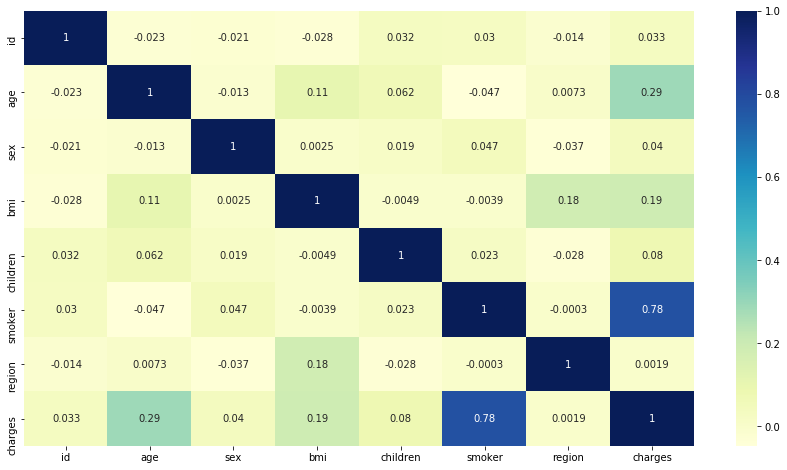

In [13]:
plt.subplots(figsize=(15,8))
sb.heatmap(df1.corr(),annot=True, cmap="YlGnBu")

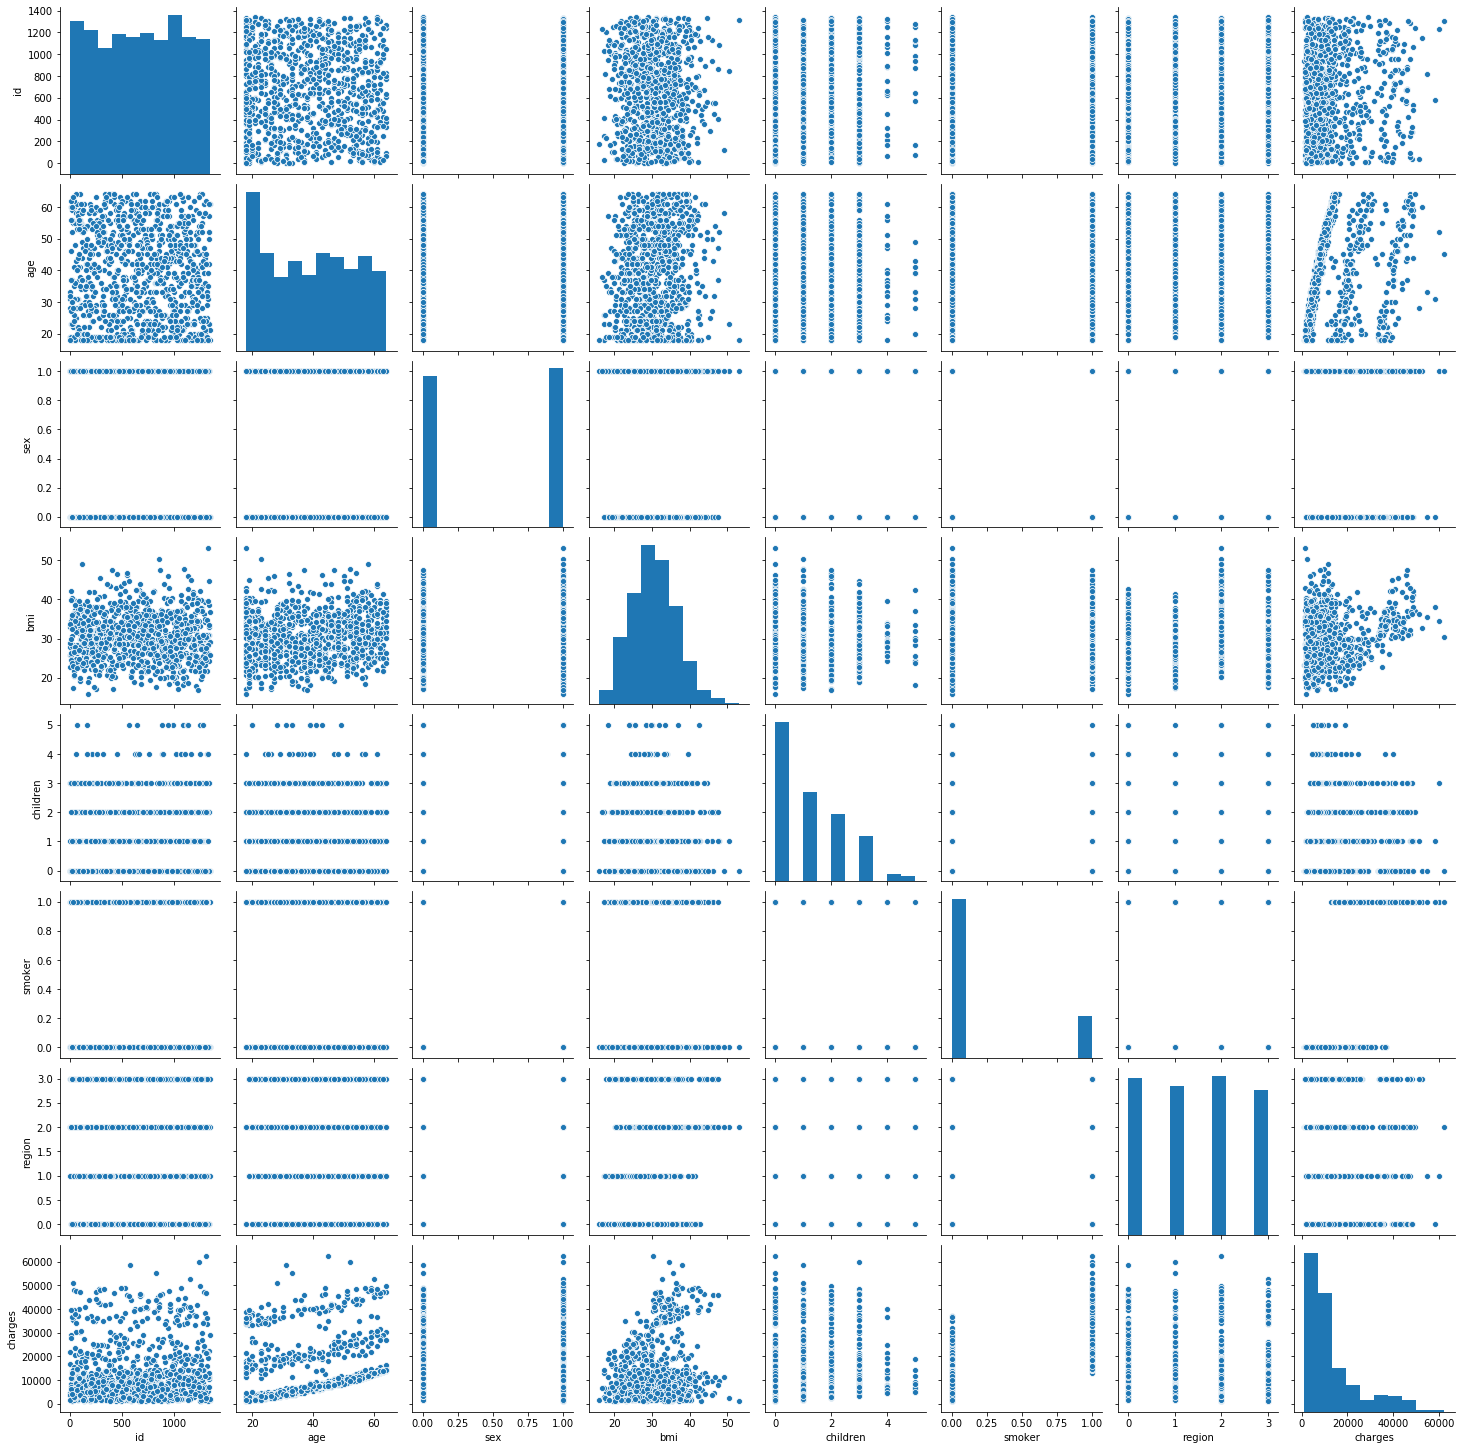

In [14]:
sb.pairplot(df1)

In [15]:
model01 = smf.ols("charges~age+sex+bmi+children+smoker+region", data=df1).fit()

In [16]:
model01.params

Intercept   -12364.391322
age            261.625690
sex            109.647196
bmi            344.544831
children       424.370166
smoker       23620.802521
region        -326.462625
dtype: float64

In [17]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     445.9
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          1.88e-269
Time:                        23:58:46   Log-Likelihood:                -9493.1
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.236e+04   1180.315    -10.475      0.000   -1.47e+04      -1e+04
age          261.6257     14.409     18.158      0.000     233.349     289.903
sex          109.6472    404.140      0.271      0.786    -683.486     902.780
bmi          344.5448     34.416     10.011      0.000     277.002     412.087
children     424.3702    166.803      2.544      0.011      97.016     751.724
smoker      2.362e+04    497.617     47.468      0.000    2.26e+04    2.46e+04
region      -326.4626    184.451     -1.770      0.077    -688.451      35.525
==============================================================================
Omnibus:                      223.795   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.158
Skew:                           1.266   Prob(JB):                    8.38e-118
Kurtosis:                       5.722   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

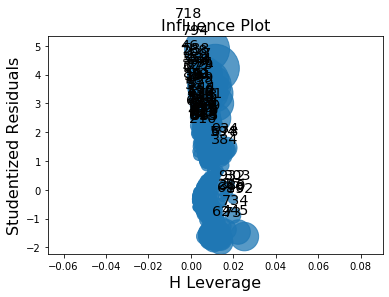

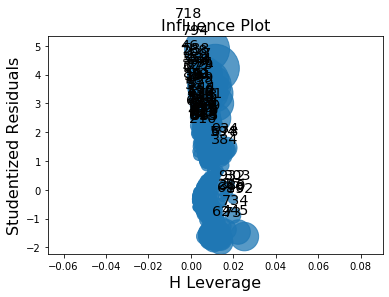

In [24]:
sm.graphics.influence_plot(model01)

In [25]:
#we see the records 718, 445, 794 and 734 having high influence on our model
#so we will go on removing one by one and check which is better to be removed

In [26]:
df2 = df1.drop(df1.index[[718]],axis=0)

In [27]:
model02 = smf.ols("charges~age+sex+bmi+children+region+smoker", data=df2).fit()

In [28]:
model02.params

Intercept   -12319.413031
age            260.286679
sex             50.401706
bmi            345.532662
children       450.741726
region        -340.960006
smoker       23467.104031
dtype: float64

In [29]:
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     450.0
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          1.12e-270
Time:                        00:13:52   Log-Likelihood:                -9471.6
No. Observations:                 935   AIC:                         1.896e+04
Df Residuals:                     928   BIC:                         1.899e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.232e+04   1166.094    -10.565      0.000   -1.46e+04      -1e+04
age          260.2867     14.237     18.282      0.000     232.346     288.227
sex           50.4017    399.442      0.126      0.900    -733.513     834.317
bmi          345.5327     34.001     10.162      0.000     278.805     412.261
children     450.7417    164.876      2.734      0.006     127.168     774.315
region      -340.9600    182.247     -1.871      0.062    -698.623      16.703
smoker      2.347e+04    492.612     47.638      0.000    2.25e+04    2.44e+04
==============================================================================
Omnibus:                      208.264   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.223
Skew:                           1.222   Prob(JB):                    3.15e-100
Kurtosis:                       5.406   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#we will now remove record 718,794,734 and 445
df3 = df1.drop(df1.index[[718,794,734,445]],axis=0)

In [86]:
model03 = smf.ols("charges~age+sex+bmi+children+region+smoker", data=df3).fit()

In [87]:
model03.params

Intercept   -12437.677517
age            259.910301
sex            147.195844
bmi            346.264480
children       463.806515
region        -294.975709
smoker       23306.373385
dtype: float64

In [88]:
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     452.2
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          4.99e-271
Time:                        00:27:11   Log-Likelihood:                -9432.0
No. Observations:                 932   AIC:                         1.888e+04
Df Residuals:                     925   BIC:                         1.891e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.244e+04   1160.735    -10.715      0.000   -1.47e+04   -1.02e+04
age          259.9103     14.134     18.389      0.000     232.172     287.649
sex          147.1958    396.233      0.371      0.710    -630.424     924.816
bmi          346.2645     34.059     10.166      0.000     279.422     413.107
children     463.8065    164.275      2.823      0.005     141.412     786.201
region      -294.9757    180.854     -1.631      0.103    -649.908      59.957
smoker      2.331e+04    489.031     47.658      0.000    2.23e+04    2.43e+04
==============================================================================
Omnibus:                      201.824   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.356
Skew:                           1.209   Prob(JB):                     2.62e-93
Kurtosis:                       5.266   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

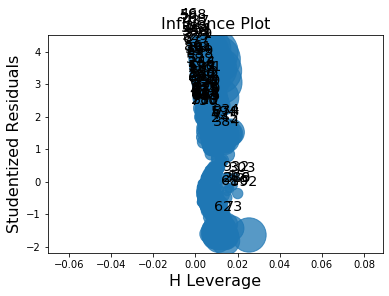

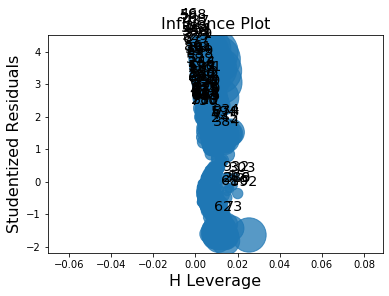

In [80]:
sm.graphics.influence_plot(model03)

In [89]:
#we will predict the values for charges based on model03
charges_pred03 = model03.predict(df3.iloc[:,1:7])

In [90]:
charges_pred03

0      13911.476318
1       8337.364682
2      13444.783763
3      35936.083822
4      33620.195249
           ...     
931     4951.325397
932     7693.238508
933    11501.524058
934    37010.252136
935    11472.965694
Length: 932, dtype: float64

In [91]:
df3.head()

,id,age,sex,bmi,children,smoker,region,charges
0,333,61,0,31.160,0,0,1,13429.03540
1,356,46,1,27.600,0,0,3,24603.04837
2,139,54,0,31.900,3,0,2,27322.73386
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560


In [92]:
df3["predicted_charges"] = charges_pred03

In [93]:
df3.head()

,id,age,sex,bmi,children,smoker,region,charges,predicted_charges
0,333,61,0,31.160,0,0,1,13429.03540,13911.476318
1,356,46,1,27.600,0,0,3,24603.04837,8337.364682
2,139,54,0,31.900,3,0,2,27322.73386,13444.783763
3,382,55,1,30.685,0,1,0,42303.69215,35936.083822
4,293,25,1,45.540,2,1,2,42112.23560,33620.195249


In [94]:
df3.tail()

,id,age,sex,bmi,children,smoker,region,charges,predicted_charges
931,1096,18,0,31.350,4,0,0,4561.18850,4951.325397
932,1131,39,0,23.870,5,0,2,8582.30230,7693.238508
933,1295,58,1,25.175,0,0,0,11931.12525,11501.524058
934,861,37,0,47.600,2,1,3,46113.51100,37010.252136
935,1127,55,1,29.900,0,0,3,10214.63600,11472.965694


Text(0, 0.5, 'residuals')

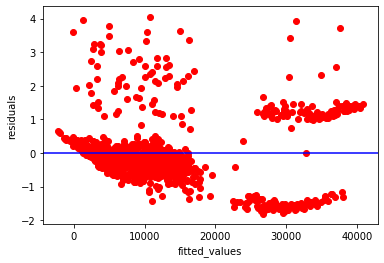

In [97]:
# Residuals VS Fitted Values 
plt.scatter(charges_pred03,model03.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")

(array([ 93.,  77., 394., 194.,  36.,  83.,  19.,  17.,  10.,   9.]),
 array([-1.80169708, -1.21636077, -0.63102445, -0.04568813,  0.53964819,
         1.12498451,  1.71032082,  2.29565714,  2.88099346,  3.46632978,
         4.05166609]),
 <a list of 10 Patch objects>)

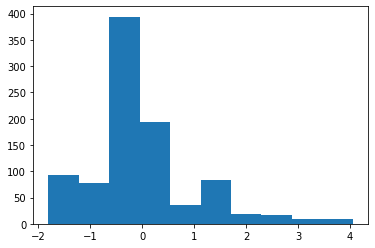

In [98]:
########    Normality plot for residuals ######
# histogram
plt.hist(model03.resid_pearson) 

In [20]:
#we see that the r sqr value is not increasing after all attempts
#so we will try to normalize the dataset df1 and then try again

In [21]:
def norm_fun(i):
        x = (i - i.min()) / (i.max()-i.min())
        return x

In [22]:
df1_norm = norm_fun(df1.iloc[:,1:])

In [23]:
df1_norm.head()

,age,sex,bmi,children,smoker,region,charges
0,0.934783,0.0,0.408932,0.0,0.0,0.333333,0.200211
1,0.608696,1.0,0.313156,0.0,0.0,1.000000,0.381988
2,0.782609,0.0,0.428840,0.6,0.0,0.666667,0.426231
3,0.804348,1.0,0.396153,0.0,1.0,0.000000,0.669939
4,0.152174,1.0,0.795803,0.4,1.0,0.666667,0.666824


In [25]:
df1_norm["id"] = df1["id"]

In [26]:
df1_norm.head()

,age,sex,bmi,children,smoker,region,charges,id
0,0.934783,0.0,0.408932,0.0,0.0,0.333333,0.200211,333
1,0.608696,1.0,0.313156,0.0,0.0,1.000000,0.381988,356
2,0.782609,0.0,0.428840,0.6,0.0,0.666667,0.426231,139
3,0.804348,1.0,0.396153,0.0,1.0,0.000000,0.669939,382
4,0.152174,1.0,0.795803,0.4,1.0,0.666667,0.666824,293


In [27]:
df1.head()

,id,age,sex,bmi,children,smoker,region,charges
0,333,61,0,31.160,0,0,1,13429.03540
1,356,46,1,27.600,0,0,3,24603.04837
2,139,54,0,31.900,3,0,2,27322.73386
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560


In [28]:
model04 = smf.ols("charges~age+sex+bmi+children+smoker+region", data= df1_norm).fit()

In [29]:
model04.params

Intercept   -0.053327
age          0.195780
sex          0.001784
bmi          0.208338
children     0.034518
smoker       0.384259
region      -0.015933
dtype: float64

In [30]:
model04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     445.9
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          1.88e-269
Time:                        14:41:37   Log-Likelihood:                 827.53
No. Observations:                 936   AIC:                            -1641.
Df Residuals:                     929   BIC:                            -1607.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0533      0.011     -4.804      0.000      -0.075      -0.032
age            0.1958      0.011     18.158      0.000       0.175       0.217
sex            0.0018      0.007      0.271      0.786      -0.011       0.015
bmi            0.2083      0.021     10.011      0.000       0.167       0.249
children       0.0345      0.014      2.544      0.011       0.008       0.061
smoker         0.3843      0.008     47.468      0.000       0.368       0.400
region        -0.0159      0.009     -1.770      0.077      -0.034       0.002
==============================================================================
Omnibus:                      223.795   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.158
Skew:                           1.266   Prob(JB):                    8.38e-118
Kurtosis:                       5.722   Cond. No.                         9.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#we see that normalizing the data is also not helping in increasing r sqr
#so now we will use the original dataset but without the outliers

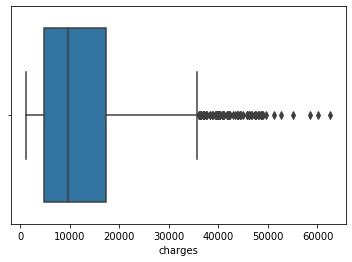

In [32]:
sb.boxplot(x="charges", data=df1)

In [33]:
df1[df1["charges"]>35000]

,id,age,sex,bmi,children,smoker,region,charges
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560
5,1091,47,1,36.190,0,1,2,41676.08110
10,550,43,0,46.200,0,1,2,45863.20500
41,683,39,1,35.300,2,1,3,40103.89000
...,...,...,...,...,...,...,...,...
879,35,28,1,36.400,1,1,3,51194.55914
909,857,48,0,33.110,0,1,2,40974.16490
911,253,54,1,34.210,2,1,2,44260.74990
926,331,61,0,36.385,1,1,0,48517.56315


In [34]:
df1[df1["charges"]>35000].count()

id          92
age         92
sex         92
bmi         92
children    92
smoker      92
region      92
charges     92
dtype: int64

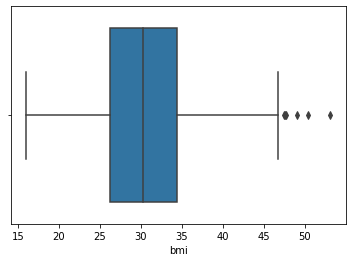

In [35]:
sb.boxplot(x="bmi", data=df1)

In [36]:
df1[df1["bmi"]>46]

,id,age,sex,bmi,children,smoker,region,charges
10,550,43,0,46.20,0,1,2,45863.2050
62,848,23,1,50.38,1,0,2,2438.0552
184,1089,52,1,47.74,1,0,2,9748.9106
285,942,50,0,46.09,1,0,2,9549.5651
407,455,32,1,46.53,2,0,2,4686.3887
436,548,54,0,46.70,2,0,3,11538.4210
445,1318,18,1,53.13,0,0,2,1163.4627
570,117,58,1,49.06,0,0,2,11381.3254
871,402,47,1,47.52,1,0,2,8083.9198
934,861,37,0,47.60,2,1,3,46113.5110


In [37]:
df1[df1["bmi"]>46].count()

id          10
age         10
sex         10
bmi         10
children    10
smoker      10
region      10
charges     10
dtype: int64

In [5]:
#we will remove the bmi outliers
df1_new = df1.drop(df1.index[[10,62,184,285,407,436,445,570,871,934]], axis=0)

In [10]:
df1_new.iloc[0:15, :]

,id,age,sex,bmi,children,smoker,region,charges
0,333,61,0,31.160,0,0,1,13429.03540
1,356,46,1,27.600,0,0,3,24603.04837
2,139,54,0,31.900,3,0,2,27322.73386
3,382,55,1,30.685,0,1,0,42303.69215
4,293,25,1,45.540,2,1,2,42112.23560
5,1091,47,1,36.190,0,1,2,41676.08110
6,1076,32,0,29.590,1,0,2,4562.84210
7,142,26,1,32.490,1,0,0,3490.54910
8,677,55,0,40.810,3,0,2,12485.80090
9,627,36,1,28.880,3,0,0,6748.59120


In [6]:
model05 = smf.ols("charges~age+sex+bmi+children+smoker+region", data = df1_new).fit()

In [7]:
model05.params

Intercept   -13144.493953
age            260.660943
sex            230.673705
bmi            372.712911
children       419.134000
smoker       23440.090704
region        -331.352743
dtype: float64

In [9]:
model05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     441.2
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          1.46e-266
Time:                        22:07:15   Log-Likelihood:                -9387.9
No. Observations:                 926   AIC:                         1.879e+04
Df Residuals:                     919   BIC:                         1.882e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.314e+04   1214.001    -10.827      0.000   -1.55e+04   -1.08e+04
age          260.6609     14.421     18.076      0.000     232.360     288.962
sex          230.6737    404.774      0.570      0.569    -563.715    1025.062
bmi          372.7129     35.946     10.369      0.000     302.168     443.258
children     419.1340    166.514      2.517      0.012      92.342     745.926
smoker      2.344e+04    498.381     47.033      0.000    2.25e+04    2.44e+04
region      -331.3527    183.864     -1.802      0.072    -692.194      29.489
==============================================================================
Omnibus:                      229.273   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.919
Skew:                           1.305   Prob(JB):                    4.29e-122
Kurtosis:                       5.770   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#we see that even after removing the outliers we are not getting a better model than model03
#so now we will apply the polynomial form of regression 

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
#we start by taking degree 3
polynomial_features = PolynomialFeatures(degree=3)

In [14]:
polynomial_features

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [16]:
#now we pass the x columns into an object df_poly 
df_poly = polynomial_features.fit_transform(df1_new.iloc[:,1:7])

In [18]:
df_poly.shape

(926, 84)

In [66]:
#now we do the polynomial regression model
model01_poly = sm.OLS(df1_new.charges, df_poly).fit()

In [67]:
model01_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     68.90
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          1.46e-301
Time:                        22:59:14   Log-Likelihood:                -9145.3
No. Observations:                 926   AIC:                         1.843e+04
Df Residuals:                     856   BIC:                         1.877e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.729e+04   1.99e+04      3.375      0.001    2.82e+04    1.06e+05
x1         -1021.1340    626.385     -1.630      0.103   -2250.565     208.297
x2         -4613.4396   3086.174     -1.495      0.135   -1.07e+04    1443.916
x3         -5219.1656   1653.658     -3.156      0.002   -8464.865   -1973.466
x4          8332.2242   4784.102      1.742      0.082   -1057.720    1.77e+04
x5         -1.614e+04   3869.396     -4.171      0.000   -2.37e+04   -8543.973
x6         -4067.2550   5393.028     -0.754      0.451   -1.47e+04    6517.852
x7            17.6990     11.242      1.574      0.116      -4.365      39.763
x8           247.8398    102.441      2.419      0.016      46.775     448.904
x9            19.6792     23.028      0.855      0.393     -25.519      64.877
x10         -249.7287     98.648     -2.532      0.012    -443.349     -56.108
x11          114.2264    123.757      0.923      0.356    -128.675     357.128
x12           95.3366    101.562      0.939      0.348    -104.003     294.676
x13        -4613.4396   3086.174     -1.495      0.135   -1.07e+04    1443.916
x14           92.3487    264.613      0.349      0.727    -427.019     611.716
x15        -1193.8984    972.046     -1.228      0.220   -3101.771     713.974
x16          626.1250   1739.187      0.360      0.719   -2787.446    4039.696
x17         1268.2841   1021.958      1.241      0.215    -737.552    3274.121
x18          161.9098     53.237      3.041      0.002      57.420     266.399
x19          -11.9300    239.821     -0.050      0.960    -482.636     458.776
x20         1546.0455    335.381      4.610      0.000     887.780    2204.311
x21           41.8653    281.758      0.149      0.882    -511.151     594.882
x22         -917.6792    924.594     -0.993      0.321   -2732.415     897.057
x23         -198.0114   1267.537     -0.156      0.876   -2685.856    2289.833
x24         -772.3651    992.056     -0.779      0.436   -2719.513    1174.783
x25        -1.614e+04   3869.396     -4.171      0.000   -2.37e+04   -8543.973
x26        -2106.8072   1292.460     -1.630      0.103   -4643.569     429.955
x27          838.4774   1428.620      0.587      0.557   -1965.530    3642.485
x28           -0.0589      0.086     -0.688      0.492      -0.227       0.109
x29           -2.6201      2.082     -1.259      0.209      -6.706       1.466
x30           -0.1879      0.190     -0.988      0.324      -0.561       0.186
x31            1.9676      0.918      2.144      0.032       0.167       3.769
x32           -4.3508      2.477     -1.756      0.079      -9.213       0.512
x33           -0.2901      0.997     -0.291      0.771      -2.248       1.668
x34          247.8398    102.441      2.419      0.016      46.775     448.904
x35           -8.7142      4.292     -2.030      0.043     -17.139      -0.289
x3

In [32]:
#we see that the r2 sqr value has tremendously increased with polynomial regression
#we can now increase the degree and then check the results

In [62]:
degree7 = PolynomialFeatures(degree=7)

In [63]:
df_poly_4 = degree7.fit_transform(df1_new.iloc[:,1:7])

In [64]:
model02_poly = sm.OLS(df1_new["charges"], df_poly_4).fit()

In [65]:
model02_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     17.41
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          1.50e-133
Time:                        22:58:51   Log-Likelihood:                -8465.7
No. Observations:                 926   AIC:                         1.807e+04
Df Residuals:                     359   BIC:                         2.080e+04
Df Model:                         566                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1540.0575   4134.615     -0.372      0.710   -9671.167    6591.052
x1         -8234.6504   1.87e+04     -0.441      0.659    -4.5e+04    2.85e+04
x2         -1424.3013   1119.859     -1.272      0.204   -3626.609     778.006
x3         -1.577e+04   1.66e+04     -0.950      0.343   -4.84e+04    1.69e+04
x4         -6602.9427   3363.167     -1.963      0.050   -1.32e+04      11.041
x5            91.1323     64.236      1.419      0.157     -35.194     217.459
x6           398.8437   1985.749      0.201      0.841   -3506.318    4304.005
x7         -8826.8429    1.7e+04     -0.520      0.603   -4.22e+04    2.45e+04
x8         -1147.3288   6082.924     -0.189      0.851   -1.31e+04    1.08e+04
x9          3.261e+04   4.32e+04      0.754      0.451   -5.24e+04    1.18e+05
x10        -2.559e+04   2.21e+04     -1.157      0.248   -6.91e+04    1.79e+04
x11         -278.4560    180.979     -1.539      0.125    -634.369      77.457
x12         2.544e+04   1.82e+04      1.396      0.164   -1.04e+04    6.13e+04
x13        -1284.3397   1100.462     -1.167      0.244   -3448.501     879.822
x14        -4955.1498   5307.969     -0.934      0.351   -1.54e+04    5483.470
x15        -4549.1932   2035.548     -2.235      0.026   -8552.290    -546.097
x16          -12.9118      6.450     -2.002      0.046     -25.595      -0.228
x17        -2219.0321   2285.054     -0.971      0.332   -6712.805    2274.741
x18        -2.554e+04   2.59e+04     -0.984      0.326   -7.66e+04    2.55e+04
x19        -3.377e+04   1.63e+04     -2.071      0.039   -6.58e+04   -1702.720
x20         -172.4831    164.510     -1.048      0.295    -496.008     151.042
x21         6705.9645   9984.513      0.672      0.502   -1.29e+04    2.63e+04
x22         -598.9404   2686.667     -0.223      0.824   -5882.524    4684.643
x23           26.9944     15.278      1.767      0.078      -3.051      57.039
x24         1518.5507   1383.569      1.098      0.273   -1202.368    4239.470
x25          -18.2156     18.300     -0.995      0.320     -54.205      17.774
x26          -17.9950     22.029     -0.817      0.415     -61.316      25.326
x27        -1856.4226   3811.674     -0.487      0.627   -9352.437    5639.591
x28          528.4387    720.253      0.734      0.464    -888.006    1944.883
x29        -2055.0848   1575.948     -1.304      0.193   -5154.334    1044.165
x30         -841.2862   1422.879     -0.591      0.555   -3639.512    1956.940
x31        -3421.2184   6029.737     -0.567      0.571   -1.53e+04    8436.826
x32        -1209.7051    981.873     -1.232      0.219   -3140.650     721.240
x33         -709.3645   2924.688     -0.243      0.808   -6461.039    5042.310
x34        -1281.9424   6087.771     -0.211      0.833   -1.33e+04    1.07e+04
x35         3549.1545   3912.206      0.907      0.365   -4144.565    1.12e+04
x3

In [61]:
#we observe that as we increase the degree, the r2 value goes on increasing
#but what degree do we stop at? does increasing the degree affect any other things?

In [68]:
#for time being we will use model01_poly to train the machine

In [69]:
pred01_poly = model01_poly.predict(df_poly)

In [70]:
pred01_poly.shape

(926,)

In [71]:
#adding the column of predictions to df1_new

In [76]:
pred01_poly

array([14316.92894606,  8832.71582864, 14613.23878412, 37708.86950844,
       42508.25331586, 45231.66918912,  5468.242538  ,  6707.63611518,
       14254.06883379,  7781.04851763,  3458.31922974,  7910.10202076,
       14300.31689949, 24660.90904301,  9177.52124895,  2973.01323337,
       12338.30771896,  5763.92123034,  6001.65514915,  9604.22917116,
        1294.89556825, 19752.27983698,  8337.52345083,  4742.50738635,
        3863.0245188 ,  5898.79382617, 14356.7352515 , 24124.64817734,
        9047.26501128,  9799.75129289,  6048.00670773,  9673.87196707,
        3915.11170506,  6926.70274514, 10269.14478557, 13006.29574372,
       10952.35702182,  9464.29878202,  3896.96036517,  7507.1434143 ,
       39902.26006796, 33012.20539231,  3321.90657638, 52707.69098676,
       36481.35447769, 13054.3194065 ,  3350.42279393, 13022.58269367,
        3159.05730056, 10121.00699207, 32355.04259207, 19535.3904011 ,
       12647.26980279,  8067.73175139, 13467.37923604,  9546.35432449,
      

In [81]:
df1_new["predictions_poly"] = pred01_poly

In [82]:
df1_new.head()

,id,age,sex,bmi,children,smoker,region,charges,predictions_poly
0,333,61,0,31.160,0,0,1,13429.03540,14316.928946
1,356,46,1,27.600,0,0,3,24603.04837,8832.715829
2,139,54,0,31.900,3,0,2,27322.73386,14613.238784
3,382,55,1,30.685,0,1,0,42303.69215,37708.869508
4,293,25,1,45.540,2,1,2,42112.23560,42508.253316


In [83]:
df1_new.tail()

,id,age,sex,bmi,children,smoker,region,charges,predictions_poly
930,1045,55,1,35.245,1,0,0,11394.06555,13938.080075
931,1096,18,0,31.350,4,0,0,4561.18850,12038.490140
932,1131,39,0,23.870,5,0,2,8582.30230,9595.498233
933,1295,58,1,25.175,0,0,0,11931.12525,12224.081861
935,1127,55,1,29.900,0,0,3,10214.63600,11968.355059


In [105]:
#calculating residuals
resid = pred01_poly - df1_new.charges

In [108]:
#getting rms error value
rmse = np.sqrt(np.mean(resid*resid))

In [109]:
rmse

4708.794933902531

In [110]:
#now we move on to fresh test dataset
df_test = pd.read_csv("C:\\Users\\Neel Madane\\OneDrive\\Desktop\\AIDA\\multiple linear regression\\execom ieee dataset\\test.csv")

In [86]:
df_test.shape

(402, 7)

In [87]:
df_test.head()

,id,age,sex,bmi,children,smoker,region
0,765,45,0,25.175,2,0,0
1,888,36,0,30.020,0,0,1
2,891,64,0,26.885,0,1,1
3,1294,46,1,25.745,3,0,1
4,260,19,1,31.920,0,1,1


In [91]:
#now we predict the charges for test dataset based on model01_poly
#we start iloc from 1 cuz we dont need column zero ie id in the model
#test_preds = model01_poly.predict(df_test.iloc[:,1:])
#the above code fails to run and throws an error that the no. of columns dont match
#it is so cuz our trained polynomial model has 84 column whereas the test dataset has just 6
#so we need to convert the test dataset into the same degree dataframe as  our model
#ie we need to convert the test dataset into degree 3 dataset having 84 columns

In [93]:
degree3 = PolynomialFeatures(degree=3)

In [94]:
df_test_poly = degree3.fit_transform(df_test.iloc[:,1:7])

In [95]:
df_test_poly.shape

(402, 84)

In [96]:
#now we can predict the test dataset predictions 
test_pred = model01_poly.predict(df_test_poly)

In [97]:
test_pred

array([ 9866.36480995,  5297.29795151, 29091.40085198,  9486.8675882 ,
       27924.18761586,  5015.4336575 ,  3654.69794588, 14288.55417021,
        7446.59066179, 11481.84153208, 16539.90867123,  9090.25179727,
        5013.21400442, 49529.46600496, 51748.22977993, 46852.98375422,
        9314.27034524, 43757.88198638,  9095.84898556, 25353.42283848,
        1997.1310023 ,  7929.74308454,  2309.19529236,  4775.61412635,
       11573.7735437 , 13080.04679269, 15433.53916337,  7064.25190852,
       10670.09785612,  2544.83234319,  8582.03166114, 12820.76809782,
        2616.94096624,  8328.34816155,  3385.13565501,  9707.45597472,
        4324.74939316,  8592.53752266, 21777.07340695, 39232.30924801,
        6935.70951436,  5303.15361983, 14326.65959696, 13617.46225579,
        7775.32995494, 13055.67803061,  6874.19681171,  5305.6254217 ,
       42584.46998104,  7546.75400937, 15777.01222915,  3937.12554858,
        7257.0148095 ,  1627.06920742, 13045.16321128, 12377.12887512,
      

In [98]:
df_test["predictions_poly"] = test_pred

In [99]:
df_test.head()

,id,age,sex,bmi,children,smoker,region,predictions_poly
0,765,45,0,25.175,2,0,0,9866.364810
1,888,36,0,30.020,0,0,1,5297.297952
2,891,64,0,26.885,0,1,1,29091.400852
3,1294,46,1,25.745,3,0,1,9486.867588
4,260,19,1,31.920,0,1,1,27924.187616


In [100]:
df_test.tail()

,id,age,sex,bmi,children,smoker,region,predictions_poly
397,702,50,0,44.745,0,0,0,10626.502377
398,673,36,1,29.700,0,0,2,6571.583969
399,1164,18,0,28.215,0,0,0,4920.894304
400,1104,58,1,36.080,0,0,2,13401.220945
401,1296,20,1,22.000,1,0,3,1224.495458


In [104]:
#now we will move the predictions_poly column to our csv test 
df_test.to_csv("testpreds.csv")